# TBA 3102 - Text Analytics
## Practical Lab 06 - Feature Engineering for Text Representation
### Question 2 - Advanced Feature Engineering
Student: Nicky Ng <br>
GitHub User: [ahjimomo](https://github.com/ahjimomo) <br>
Student Number: A0194330L

<b>Libraries for Question 2</b>

In [1]:
# Data wrangling
import numpy as np
import pandas as pd

# Feature Engineering & Text Representation
import nltk
from gensim.models import word2vec
from sklearn.manifold import TSNE
from sklearn.cluster import AffinityPropagation

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Display
from IPython.core.display import HTML

<b>2a. Sample 50% as per question 1a</b>

In [2]:
# Import dataset
df = pd.read_csv('./data/very_cleaned.csv')
df.head()

,Unnamed: 0,asins,name,brand,categories,reviews.doRecommend,reviews.numHelpful,reviews.rating,reviews.text,reviews.title,reviews.text_cleaned,reviews.text_very_cleaned
0,0,B01AHB9CN2,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",True,0,5,This product so far has not disappointed. My c...,Kindle,this product so far has not disappointed my ch...,product far disappoint child love use like abi...
1,1,B01AHB9CN2,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",True,0,5,great for beginner or experienced person. Boug...,very fast,great for beginner or experienced person bough...,great beginner experience person buy gift love
2,2,B01AHB9CN2,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",True,0,5,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,expensive tablet for him to use and learn on s...,expensive tablet use learn step nasi thrill le...
3,3,B01AHB9CN2,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",True,0,4,I've had my Fire HD 8 two weeks now and I love...,Good!!!,i have had my fire he 8 two weeks now and i lo...,fire 8 two week love tablet great value prime ...
4,4,B01AHB9CN2,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",True,0,5,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,i bought this for my grand daughter when she c...,buy grand daughter come visit set user enter a...


In [3]:
# set random seed
random_state = 42

In [4]:
# Extract 50% sample without replacement
## Update: Issue with computer memory space, reducing to 0.35
sample_df = df.sample(frac = 0.35, replace = False, random_state = random_state)
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11921 entries, 4990 to 19458
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Unnamed: 0                 11921 non-null  int64 
 1   asins                      11921 non-null  object
 2   name                       9566 non-null   object
 3   brand                      11921 non-null  object
 4   categories                 11921 non-null  object
 5   reviews.doRecommend        11921 non-null  bool  
 6   reviews.numHelpful         11921 non-null  int64 
 7   reviews.rating             11921 non-null  int64 
 8   reviews.text               11921 non-null  object
 9   reviews.title              11921 non-null  object
 10  reviews.text_cleaned       11921 non-null  object
 11  reviews.text_very_cleaned  11921 non-null  object
dtypes: bool(1), int64(3), object(8)
memory usage: 1.1+ MB


In [5]:
# Change data type for 'unamed: 0' to object
sample_df['Unnamed: 0'] = sample_df['Unnamed: 0'].map(str)
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11921 entries, 4990 to 19458
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Unnamed: 0                 11921 non-null  object
 1   asins                      11921 non-null  object
 2   name                       9566 non-null   object
 3   brand                      11921 non-null  object
 4   categories                 11921 non-null  object
 5   reviews.doRecommend        11921 non-null  bool  
 6   reviews.numHelpful         11921 non-null  int64 
 7   reviews.rating             11921 non-null  int64 
 8   reviews.text               11921 non-null  object
 9   reviews.title              11921 non-null  object
 10  reviews.text_cleaned       11921 non-null  object
 11  reviews.text_very_cleaned  11921 non-null  object
dtypes: bool(1), int64(2), object(9)
memory usage: 1.1+ MB


<b>1b. Apply Word2Vec using CBOW on review text data using Gensim library to obtain the word embeddings</b>

In [6]:
# build word2vec model
wpt = nltk.WordPunctTokenizer()
tokenized_corpus = [wpt.tokenize(review) for review in sample_df['reviews.text_very_cleaned']]

In [7]:
tokenized_corpus[2]

['would', 'definitely', 'recommend', 'convenient', 'quick', 'responsive']

In [8]:
# Set values for various parameters
feature_size = 100   # Word vector dimensionality (Re-attemping at feature_size 50 to reduce size required)
window_context = 5   # Context window size, recommended online to set to parameter = 5 for CBOW architecture
min_word_count = 1   # Minimum word count
sample = 1e-3        # Downsample setting for frequent words
sg = 0               # 0 for CBOW and 1 for Skip-gram

In [9]:
# Using CBOW model model to generate embeddings (vector representation of words)
w2v_model = word2vec.Word2Vec(tokenized_corpus, vector_size = feature_size, window = window_context,
                              min_count = min_word_count, sample = sample, epochs = 1000, sg = sg, seed = random_state)

In [10]:
type(w2v_model)

gensim.models.word2vec.Word2Vec

In [11]:
# Extract words and word vector space
words = w2v_model.wv.index_to_key
wvs = w2v_model.wv[words]

In [12]:
# Review word & wvs
print(f"Shape of words: {len(words)} and shape of vector space: {len(wvs)}")
print(f"First word: {words[0]} and vector: {wvs[0]}")

Shape of words: 5884 and shape of vector space: 5884
First word: great and vector: [-6.8660426e-01 -1.1084464e+00  6.4591807e-01  8.8035786e-01
  1.8815110e+00 -1.9716284e+00 -6.3750529e-01 -4.4318363e-01
 -1.0552573e+00 -6.3605207e-01  1.6954732e+00  6.0233623e-01
  1.1409217e+00 -1.7945613e+00 -3.2577893e-01 -1.2275406e+00
  5.1804817e-01 -3.9891252e-01  6.9674623e-01 -1.4501050e+00
  2.2668745e-01  5.8412093e-01  4.7979409e-01 -5.8883035e-01
  6.7425710e-01 -8.2833518e-04 -6.8124062e-01 -1.1523756e+00
  1.2011455e+00  9.7013551e-01 -3.8084552e-01 -1.8927996e+00
 -1.7938519e+00 -1.3109388e+00  1.0133824e+00  4.1090522e-02
 -2.9932265e+00  1.9190104e-01 -5.3745389e-01  5.2530122e-01
  1.1806529e+00 -5.9540707e-01 -3.1638951e+00  1.6723114e-01
  1.9046812e-01  3.4831610e-02 -1.1526375e+00  4.4317744e-03
 -2.5667284e+00  6.1340982e-01  1.5415915e+00 -7.4778867e-01
 -4.8873991e-01  7.0709044e-01 -1.0354658e+00 -1.3910311e-01
  1.1724546e+00  4.7795808e-01  1.0137968e+00 -3.0358618e-01
  

<b>2c. Visualize word embeddings from 2b using t-SNE</b>

In [13]:
# Flatten and transform word vector space to 2D
tsne = TSNE(n_components = 2, random_state = random_state, n_iter = 5000, perplexity = 2)
np.set_printoptions(suppress = True)
T = tsne.fit_transform(wvs)
labels = words

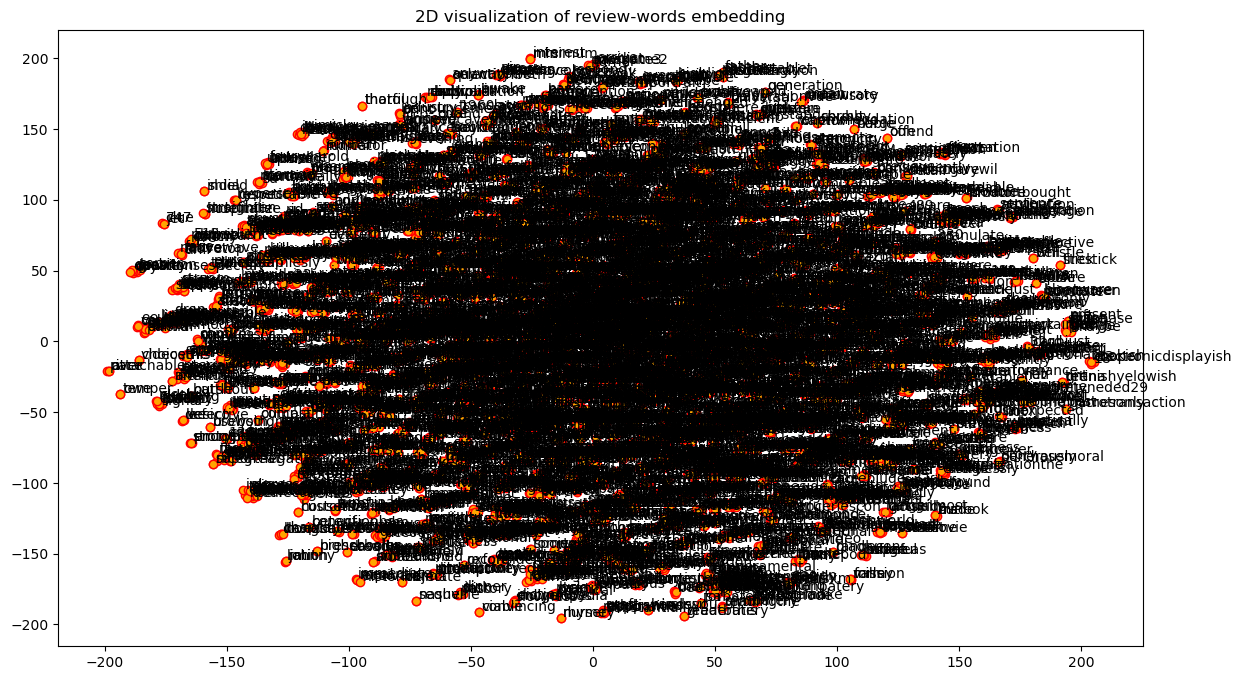

In [36]:
# Visualize the embeddings & their distance
plt.figure(figsize=(14, 8))
plt.scatter(T[:, 0], T[:, 1], c='orange', edgecolors='r')

for label, x, y in zip(labels, T[:, 0], T[:, 1]):
    
    plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points')

plt.title('2D visualization of review-words embedding')

# Save the plot
plt.savefig('./data/lab06_2c_Word2Vec_CBOW.png')

plt.show()

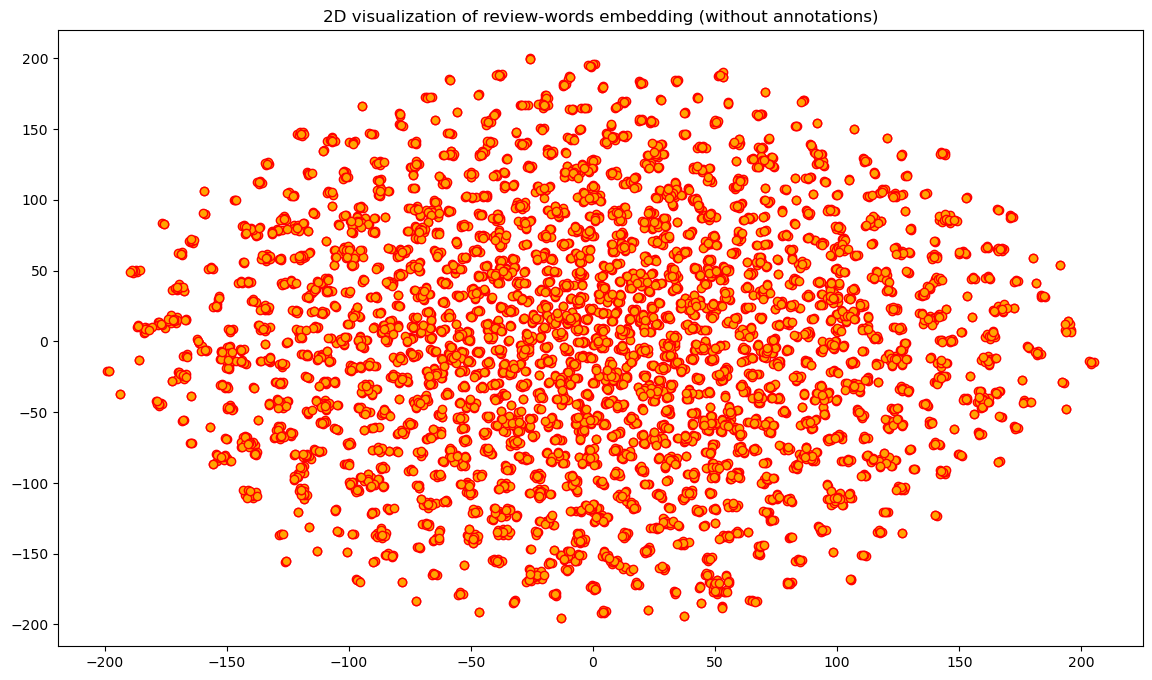

In [15]:
# Visualize the embeddings & their distance
## look at the points without annotation
plt.figure(figsize=(14, 8))
plt.scatter(T[:, 0], T[:, 1], c='orange', edgecolors='r')

plt.title('2D visualization of review-words embedding (without annotations)')
plt.show()

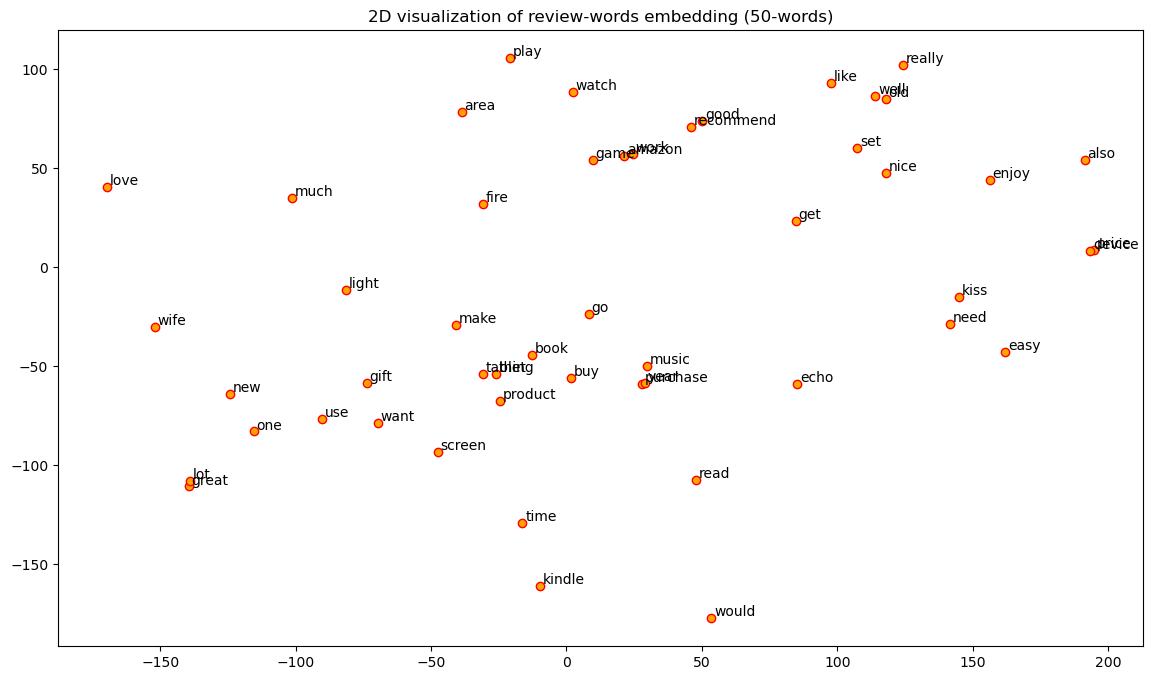

<Figure size 640x480 with 0 Axes>

In [35]:
# Visualize the embeddings & their distance
## Let's only view the first 50 since there are so many points
plt.figure(figsize=(14, 8))
plt.scatter(T[50:100, 0], T[50:100, 1], c='orange', edgecolors='r')

for label, x, y in zip(labels, T[50:100, 0], T[50:100, 1]):
    
    plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points')

plt.title('2D visualization of review-words embedding (50-words)')

plt.show()

<b>2d. Obtaining document embeddings by averaging word embeddings</b>

In [18]:
## Helper function to generate
def average_word_vectors(words, model, vocabulary, num_features):

    feature_vector = np.zeros((num_features,),dtype="float64")
    nwords = 0.
    
    for word in words:
        
        if word in vocabulary:
            
            nwords = nwords + 1.
            feature_vector = np.add(feature_vector, model.wv[word])
    
    if nwords:
        
        feature_vector = np.divide(feature_vector, nwords)
    
    return feature_vector



def averaged_word_vectorizer(corpus, model, num_features):

    vocabulary = set(model.wv.index_to_key)
    features = [average_word_vectors(tokenized_sentence, model, vocabulary, num_features) 
        for tokenized_sentence in corpus]
    
    return np.array(features)

In [19]:
# get document level embeddings
w2v_feature_array = averaged_word_vectorizer(corpus = tokenized_corpus, model = w2v_model, num_features = feature_size)
doc_embeddings_df = pd.DataFrame(w2v_feature_array)

In [20]:
doc_embeddings_df.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.207058,0.017246,0.363142,-0.249476,0.520694,-0.529169,0.102100,-0.480102,0.546384,-0.154506,...,0.622986,0.381835,-0.021095,-0.399993,-0.936622,-0.248113,-1.148116,0.187205,0.505742,0.010055
1,0.508192,-0.652005,-0.687177,0.125864,0.749244,-0.235744,-0.871621,-0.505362,-0.277942,-0.018378,...,-1.026334,-0.036677,0.813886,-0.011266,0.602905,0.229173,-0.140214,-0.545141,0.757249,0.011443
2,-0.633243,-0.949266,-0.217955,-1.451593,0.452852,-0.101591,-1.385083,0.275996,-0.923402,-1.290936,...,-1.124702,1.735263,1.408269,0.817038,1.104217,-0.397315,-0.077245,0.569113,-0.355535,1.402532
3,0.802126,-0.874226,-1.620519,1.278333,-0.365114,-0.706855,0.783216,-1.430311,-0.524534,1.237845,...,-0.954479,0.034878,-0.908420,-0.721669,-0.269033,2.436301,0.687489,-0.395908,-1.379589,-1.009807
4,0.893904,-0.738821,-1.167882,-0.073706,-0.715239,-0.088823,0.584164,-0.507274,0.458747,0.299931,...,0.016577,0.092516,0.249986,0.461499,0.033453,0.624737,0.630045,0.253521,0.907522,-0.321230


<b>2e. Perform Propagation Clustering with document embeddings</b>

In [21]:
# Define propagation clustering parameters
iterations = 300      # No. of iterations
stop_convergence = 10   # No. of iterations with no changes in estimated clustering to stop

In [22]:
# Debugging data type error
print(f"Original dtype: {w2v_feature_array.dtype}")
w2v_feature_array = w2v_feature_array.astype(np.uint8)
print(f"Updated dtype: {w2v_feature_array.dtype}")

Original dtype: float64
Updated dtype: uint8


In [23]:
# Fit clustering from avg doc embedding matrix
ap = AffinityPropagation(random_state = random_state, max_iter = iterations, convergence_iter = stop_convergence)
ap.fit(w2v_feature_array)
cluster_labels = ap.labels_
cluster_labels = pd.DataFrame(cluster_labels, columns = ['ClusterLabel'])

# Concat and generate dataframe
final_df = pd.concat([sample_df.reset_index(drop=True), cluster_labels.reset_index(drop=True)], axis = 1)

C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


In [24]:
final_df.head()

,Unnamed: 0,asins,name,brand,categories,reviews.doRecommend,reviews.numHelpful,reviews.rating,reviews.text,reviews.title,reviews.text_cleaned,reviews.text_very_cleaned,ClusterLabel
0,4990,B018Y229OU,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",Amazon,"Fire Tablets,Tablets,Computers & Tablets,All T...",True,4,4,One of the easiest android tablets to learn it...,"Great tablet for a beginner, quick to learn",one of the easiest andros tablets to learn it ...,one easy andro tablet learn function great rea...,221
1,26461,"B00L9EPT8O,B01E6AO69U","Amazon Fire Tv,,,\r\nAmazon Fire Tv,,,",Amazon,"Stereos,Remote Controls,Amazon Echo,Audio Dock...",True,0,5,This item is fantastic. Nice sound. Lots of th...,Excellent,this item is fantastic nice sound lots of thin...,item fantastic nice sound lot thing use,235
2,23294,"B00L9EPT8O,B01E6AO69U","Echo (White),,,\r\nEcho (White),,,",Amazon,"Stereos,Remote Controls,Amazon Echo,Audio Dock...",True,0,5,Would definitely recommend very convenient and...,Awesome,would definitely recommend very convenient and...,would definitely recommend convenient quick re...,532
3,28813,B01BH83OOM,NaN,Amazon Echo,"Featured Brands,Electronics,Amazon Devices,Hom...",True,0,5,"Have Amazon echo, dot and now the tap. All wor...",Nice speaker,have amazon echo dot and now the tap all work ...,amazon echo dot tap work well another tap soun...,550
4,21798,"B00L9EPT8O,B01E6AO69U","Echo (White),,,\r\nEcho (White),,,",Amazon,"Stereos,Remote Controls,Amazon Echo,Audio Dock...",True,0,5,"The echo is a really fun, handy device to have...",Fun and handy but not essential,the echo is a really fun handy device to have ...,echo really fun handy device around always sta...,0


In [25]:
# No. of clusters
final_df.ClusterLabel.nunique()

629

In [26]:
final_df.groupby('ClusterLabel').count().sort_values('reviews.text_cleaned', ascending = False)

,Unnamed: 0,asins,name,brand,categories,reviews.doRecommend,reviews.numHelpful,reviews.rating,reviews.text,reviews.title,reviews.text_cleaned,reviews.text_very_cleaned
ClusterLabel,,,,,,,,,,,,
460,205,205,164,205,205,205,205,205,205,205,205,205
78,80,80,71,80,80,80,80,80,80,80,80,80
576,74,74,11,74,74,74,74,74,74,74,74,74
217,73,73,70,73,73,73,73,73,73,73,73,73
269,73,73,59,73,73,73,73,73,73,73,73,73
...,...,...,...,...,...,...,...,...,...,...,...,...
158,1,1,1,1,1,1,1,1,1,1,1,1
153,1,1,1,1,1,1,1,1,1,1,1,1
476,1,1,1,1,1,1,1,1,1,1,1,1


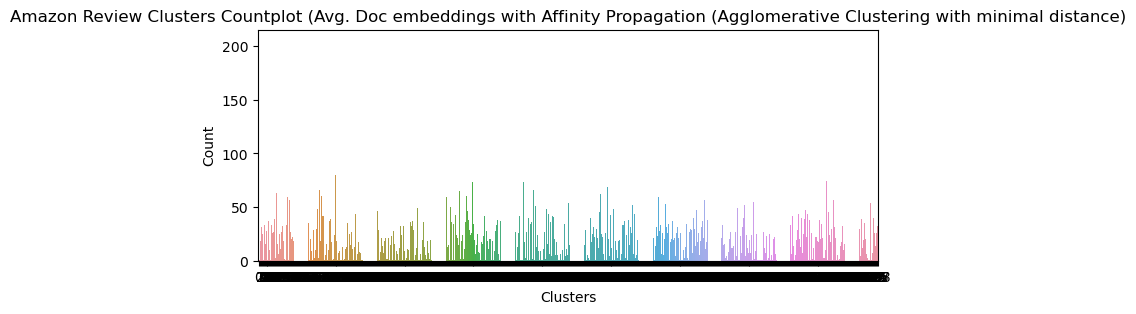

In [27]:
# Review frequency of clusters
# No. of reviews in each unique clusters
plt.figure(figsize=(8, 3))
sns.countplot(x = 'ClusterLabel', data = final_df)
plt.title('Amazon Review Clusters Countplot (Avg. Doc embeddings with Affinity Propagation (Agglomerative Clustering with minimal distance)')
plt.xlabel('Clusters')
plt.ylabel('Count')
plt.show()

In [28]:
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', None)

In [32]:
# Review clusters of interest
# Cluster 460
final_df[final_df['ClusterLabel'] == 460][['reviews.text', 'reviews.text_very_cleaned', 'ClusterLabel']].sample(10)

,reviews.text,reviews.text_very_cleaned,ClusterLabel
6019,Hard to figure out to use this tablet can't figure out how to close apps. Also says no storage to run wifi. Lastly bought three of them and one is not working wish it came with a user guide,hard figure use tablet figure close also say storage run wife lastly buy three one work wish come user guide,460
6862,Since I purchased mine the wife thought she would also like one so we picked up her one and she is using it a lot.,since purchase mine wife think would also like one pick one use lot,460
6290,"Kindle is good. I got one for my husband and sister. They are really enjoying them. It is easy to use for someone who never used one. My reason for not giving 5 stars was completely due to my best buy experience. I live in a small town and drove thirty miles to get to best buy only to find they were completely out. Asked for help at service desk and they seemed put out by me.I wanted them to call another best buy to see if they had any.I was willing to hold them with a credit card in order to get them. They would not do that. I had to drive another 50 miles to pick one up. Just thought best buy should have tried to be more accommodating, but it was Christmas shopping season.",kindle good get one husband sister really enjoy easy use someone never use one reason give 5 star completely due good buy experience live small town drive thirty mile get good buy find completely ask help service desk seem put want call another good buy see willing hold credit card order get would drive another 50 mile pick one think good buy try accommodation christmas shopping season,460
10774,Bought my husband this for Father's Day and he loves it! We even went back to get the smaller version for another area of our home and another for my father. I wish this hooked up to other Bluetooth items like the dot does,buy husband father day love even go back get small version another area home another father wish hooked bluetoth item like dot,460
10001,"I've had iPad mini's before so this tablet in my opinion can't compare. However, that being said. I bought this tablet for the purpose to watch Netflix and read books on. In my opinion it handles these two task perfectly. The screen isn't as clear and crisp like other tablets but hey I didn't pay $300 for it either. I like this size and it seems fast. I'd have to say I like it a lot. On another note, I'm giving this review only 4 stars because i am absolutely annoyed at Best Buy and their shipping. This is about the 3rd time I've ordered a product and had it shipped to me and Best Buy said it would be here at a certain date and UPS screws It up every time. Don't have any issues anywhere else but always when I order from Best Buy and have it mailed to me. Anyways, the tablet is good for the price and I'd recommend it over any other lower end teblets.",pad mind tablet opinion compare however say buy tablet purpose watch netflix read book opinion candle two task perfectly screen clear crisp like tablet hey pay 300 either like size seem fast would say like lot another note give review 4 star absolutely annoy good buy ship rd time order product ship good buy say would certain date screw every time issue anywhere else always order good buy fail anyway tablet good price would recommend low end tablet,460
6938,"At first I wanted to return this product, I bought it for my 2 yr old. I decided to keep it bc my husband liked it and of course my daughter likes it. I dnt like the fact you cant use the audible app on the kids version. I also bought it so my daughter could be independent, as far as the books none of them are read aloud. She came maneuver the games and movies tho. Its an ok product tho, I love Amazon. My daughter still likes my Samsung Tab better. Would recommend for older kids.",first want return product buy 2 old decide keep bc husband like course daughter like dint like fact use audible kiss version also buy daughter could independent far book none read aloud

In [33]:
# Review clusters of interest
# Cluster 269
final_df[final_df['ClusterLabel'] == 269][['reviews.text', 'reviews.text_very_cleaned', 'ClusterLabel']].sample(10)

,reviews.text,reviews.text_very_cleaned,ClusterLabel
6635,This box works great. It sure would be nice if it had the Google play store on it.,box work great sure would nice goose play store,269
7316,"The idea behind this is great, but the technology might not be there yet. I've had some issues with dialog from TV shows setting it off.",idea behind great technology might yet issue diploe show set,269
4118,"Compact, great playback quality. Heard about this device through a friend and I love it. Clarity is great! Understands commands quickly and concisely.",compact great playback quality hear device friend love clarity great understand command quickly concisely,269
4891,"I wanted a new tablet and saw the 7"" on sale at Christmas, my husband was offered the 8"" for just $10 more, so good value ! Thin and light weight. Easy to start up. I would have liked to have a booklet on featuers and use, etc. Nothing in print came with it other than one paper . Tutorials on set up and where the buttons and slots were. I have enjoyed the quick loading to start, just wish I had a physical booklet on how to's, not just online tutorials.",want new tablet see 7 sale christmas husband offer 8 10 good value thin light weight easy start would like booklet feature use etc nothing print come one paper tutorial set button shot enjoy quick load start wish physical booklet online tutorial,269
11220,"Just speak into the remote and your thrust on a journey through movies,Internet and shopping.",speak remote thrust journey moviesinternet shopping,269
8123,"Works the way it should. However I am baffled that there is no way to set up recurring reminders (aka take pills, etc).",work way however baffle way set recur reminder ak take pill etc,269
5779,"I bought this for my mom who didn't have a tablet at the time and she had no idea what to do with it, but with very little help from me she figured it out through the tutorials provided. The screen isn't as large as I would've hoped but it does the job.",buy mon tablet time idea little help figure tutorial provide screen large would hope job,269
7396,"One of my best purchases yet...I have always been an apple person(still am), but this tv box is great. You can do so much with it. I just ordered a gaming controller for this unit. I have amazon prime and can watch so many tv shows and movies as well as listen to music. Great all around unit.",one good purchase yet always apple personstil box great much order gaze controller unit amazon prime watch many show move well listen music great around unit,269
6046,"I bought this for my sister after her child stepped on her laptop and broke the screen! She is in love with it - it's just the right size for her to do her photo editing, surf the web, watch videos, etc. It's quite durable as well - seeing as how a four-year-old has his hands on it quite often :)The only thing that could be improved is the camera quality - but we didn't buy it to take pictures with. Just to edit them!",buy sister child step lawton break screen love right size photo edit surf web watch video etc quite unable well see fouryearold hand quite often thing could improve camera quality buy take picture edit,269
5769,Got this tablet for my daughter and it has been good for her. Size and weight is just right for her small hands. Only draw back is you can only get apps that amazon has developed. Not able to get android apps on it.,get tablet daughter good size weight right small hand draw back get amazon develop able get andro,269
